# Stock Market Analysis and Prediction: Leveraging Data Science for Insights

### Table of Contents

By following this roadmap, readers can gain a comprehensive understanding of the stock market, learn how to leverage Data Science for financial analysis, and optimize investment strategies for maximum returns. Let's get started!
1. [Introduction](#1-introduction)
2. [Data Collection and Preprocessing](#2-data-collection-and-preprocessing)
   - [Key Libraries](#key-libraries)
   - [Stock Data Retrieval with APIs](#stock-data-retrieval-with-apis)
   - [Data Cleaning and Formatting](#data-cleaning-and-formatting)
   - [Feature Engineering for Machine Learning](#feature-engineering-for-machine-learning)
   - [Selected Features for Stock Price Analysis](#selected-features-for-stock-price-analysis)
3. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)
   - [Statistical Summaries](#statistical-summaries)
   - [Visualizing Trends](#visualizing-trends)
4. [Financial Metrics](#4-financial-metrics)
   - [Performance Metrics](#performance-metrics)
   - [Risk and Volatility Analysis](#risk-and-volatility-analysis)
5. [Machine Learning Applications](#5-machine-learning-applications)
   - [Predictive Modeling](#predictive-modeling)
   - [Classification Tasks](#classification-tasks)
   - [Clustering Analysis](#clustering-analysis)
6. [Portfolio Optimization](#6-portfolio-optimization)
   - [Markowitz Mean-Variance Optimization](#markowitz-mean-variance-optimization)
   - [Black-Litterman Allocation](#black-litterman-allocation)
   - [Reinforcement Learning Approaches](#reinforcement-learning-approaches)
7. [Backtesting Investment Strategies](#7-backtesting-investment-strategies)
8. [Insights and Conclusions](#8-insights-and-conclusions)
9. [Future Work](#9-future-work)



# Introduction
____


The stock market presents a complex and dynamic environment. Investors face numerous challenges, including identifying profitable opportunities, managing risk, and optimizing portfolio allocation. This project focuses on analyzing stock data for four prominent technology companies: Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN). These companies were selected for their market leadership, innovation, and global influence.

**Objective:**

- Analyze historical stock data to identify patterns and trends.

- Use machine learning models to predict stock prices and classify stock movements.

- Evaluate investment strategies through portfolio optimization and backtesting.

Problem Statement:

- Identifying profitable investment opportunities.

- Managing risk effectively.

- Optimizing asset allocation.


# Data Collection and Preprocessing
____

### Key Libraries

The success of this project hinges on leveraging powerful Python libraries that enable financial analysis, portfolio optimization, and technical analysis. These libraries form the backbone of the notebook, facilitating data retrieval, manipulation, visualization, and modeling. Below is an overview of the key libraries used and their specific contributions to the project:


- **`yfinance`** 
  A popular library that provides access to historical stock price data, financial statements, and other key metrics for a wide range of stocks. It is a valuable resource for extracting stock data directly from Yahoo Finance for analysis.

- **`Quantstats`** 
  This library specializes in quantitative finance, offering tools for analyzing investment strategies, backtesting, and evaluating portfolio performance. It provides a comprehensive suite of functions for detailed financial analysis and visualization of key metrics


- **`PyPortfolioOpt`**
  This library focuses on portfolio optimization, enabling users to construct optimal portfolios based on various criteria such as risk, return, and constraints. It is a powerful tool for optimizing investment strategies, including mean-variance optimization and Black-Litterman models.

- **`TA-Lib`** 
  A Technical Analysis Library (TA-Lib) offers a wide range of technical indicators for analyzing stock price data. It includes functions for calculating moving averages, RSI, MACD, Bollinger Bands, and other commonly used technical indicators.

- **`Plotly`**
  This library offers interactive visualization capabilities, allowing users to create dynamic and engaging plots for exploring stock data. It provides tools for creating interactive charts, dashboards, and visualizations.

Other commonly used libraries: 

- **`Pandas`**
  This library is essential for data manipulation and analysis, allowing us to handle and preprocess stock data efficiently. It provides powerful data structures and functions for cleaning, transforming, and analyzing financial data.

- **`Numpy`**
  A fundamental library for numerical computing, Numpy provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- **`Matplotlib and Seaborn`**
  This combination of libraries is used for data visualization, enabling the creation of informative plots, charts, and graphs to visualize trends, patterns, and relationships in the stock data.

- **`Scikit-Learn`**
  A machine learning library that provides a wide range of tools for building predictive models, evaluating performance, and optimizing parameters. It includes functions for regression, classification, clustering, and model evaluation.

By combining these libraries with Python's robust data science capabilities, we can unlock the full potential of financial analysis and stock market prediction. The subsequent sections will delve into the process of collecting, preprocessing, and analyzing stock data to derive actionable insights for investors.

In [54]:
# Data Handling and Statistical Analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats
import skimpy as sp
pd.set_option('display.max_columns', None)


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive visualization libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)  # Enable Plotly offline


# Financial Data and Analysis
import ta
import talib
import quantstats as qs
import yfinance as yf
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
from pypfopt import black_litterman, BlackLittermanModel



# Machine Learning and Optimization
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.linear_model import SGDClassifier

### Data Retrieval with APIs

To initiate our analysis, we will retrieve historical stock price, and returns data for four prominent technology companies: 

- Apple: aapl

- Microsoft: msft

- Google (Alphabet): googl

- Amazon: amzn

We will utilize the `Quantstats` (qs) and `yfinance` (yf) libraries to retrieve data from Yahoo Finance. The data will cover the period from January 1, 2010, to December 31, 2021, providing over a decade of historical stock performance for analysis. The data will include daily stock prices, trading volume, and other relevant metrics that will serve as the foundation for our analysis. 

These companies were selected due to their significant market capitalization, technological innovation, and widespread global influence, making them representative of the technology sector and attractive for investment analysis.  The data will include daily stock prices, trading volume, and other relevant metrics that will serve as the foundation for our analysis. Let's begin by importing the necessary  stock data.


In [55]:
# Define the time window and stock tickers
start = '2010-01-01'
end = '2021-12-31'
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# Loop through tickers to download and save data
for ticker in tickers:
    # Download returns
    returns = qs.utils.download_returns(ticker).loc[start:end]
    returns.to_csv(f'{ticker.lower()}_returns.csv')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [56]:
# Loading the Stock Returns
aapl_returns = pd.read_csv('aapl_returns.csv', index_col=0, parse_dates=True) 
msft_returns = pd.read_csv('msft_returns.csv', index_col=0, parse_dates=True) 
googl_returns = pd.read_csv('googl_returns.csv', index_col=0, parse_dates=True) 
amzn_returns = pd.read_csv('amzn_returns.csv', index_col=0, parse_dates=True) 

In [57]:
# Display the first 5 rows of the Stock Returns
aapl_returns.head()

,AAPL
Date,
2010-01-04 00:00:00+00:00,0.015565
2010-01-05 00:00:00+00:00,0.001729
2010-01-06 00:00:00+00:00,-0.015906
2010-01-07 00:00:00+00:00,-0.001849
2010-01-08 00:00:00+00:00,0.006648


### Data Cleaning and Formatting

The focus of this section is to clean and format the stock data to ensure consistency, accuracy, and compatibility with the subsequent analysis. This process involves handling missing values (if any), standardizing column headers, and converting data types to facilitate further analysis. The cleaned data will be stored in a Pandas DataFrame for easy manipulation and exploration.

When working with financial data, it's crucial to be aware of timezones. As our data contains stock retutns, and dates are in UTC timezone, we will specifically converts the `timezone-aware DatetimeIndex` to a `timezone-naive DatetimeIndex`.    

A timezone-naive DatetimeIndex does not have any timezone information associated with it. This conversion is essential for consistency and compatibility with various financial analysis tools and libraries.

Thereafter, the columns will be rename to ensure consistency and clarity. The final step involves converting the data types to facilitate further analysis and visualization. The cleaned data will be stored in a Pandas DataFrame for easy manipulation and exploration.

In [58]:
# converting time zone to none
aapl_returns.index = aapl_returns.index.tz_convert(None)
msft_returns.index = msft_returns.index.tz_convert(None)
googl_returns.index = googl_returns.index.tz_convert(None)
amzn_returns.index = amzn_returns.index.tz_convert(None)

In [59]:
# Rename the columns
aapl_returns.columns = ['returns'] 
msft_returns.columns = ['returns']
googl_returns.columns = ['returns']
amzn_returns.columns = ['returns']

In [60]:
# Display the first few rows of the appl_data
aapl_returns.head()

,returns
Date,
2010-01-04,0.015565
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849
2010-01-08,0.006648


# Data Insight and Analysis
----


The Focus of this section is to provide insights into the stock data through exploratory data analysis (EDA), statistical summaries, and visualizations. This process involves examining key metrics such as stock prices, trading volume, and returns to identify trends, patterns, and relationships. By visualizing the data and calculating relevant statistics, we can gain a deeper understanding of the stock performance and potential investment opportunities.



<h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Daily Returns</h2>

We now have a daily return data for the four stocks, We can now plot the daily returns chart for each of them using `Quantstats`.

To have a broad view of the stock returns, the  daily returns will be benchmarked against the `S&P 500 index`. This will provide a comparison of the stock returns against the broader market performance. The S&P 500 index is a widely used benchmark for the US stock market, representing the performance of 500 large-cap companies listed on US exchanges. By comparing the stock returns to the S&P 500 index, we can assess the relative performance of the selected stocks and evaluate their risk-adjusted returns.

The S&P 500 index is commonly represented by the symbol `^GSPC` in financial data platforms like Yahoo Finance and other tools that use similar conventions. We will retrieve the historical price data for the S&P 500 index and calculate the daily returns for benchmarking purposes. The data will cover the same period as the stock data, from January 1, 2010, to December 31, 2021.




Apple Daily Returns Plot:



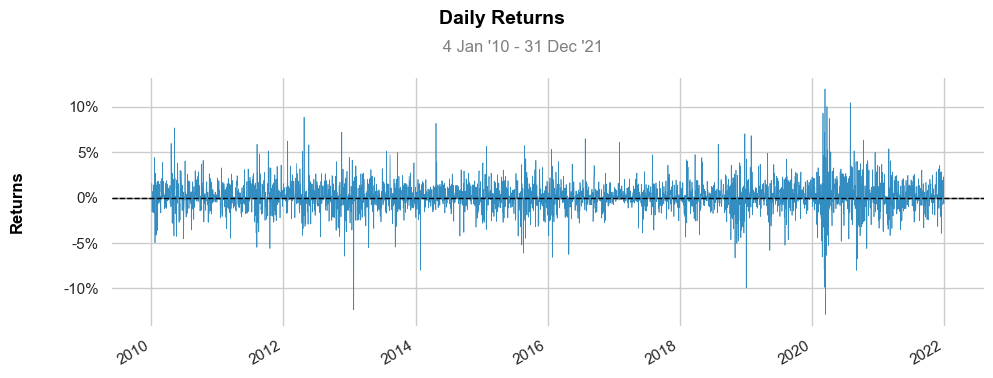




Microsoft Daily Returns Plot:



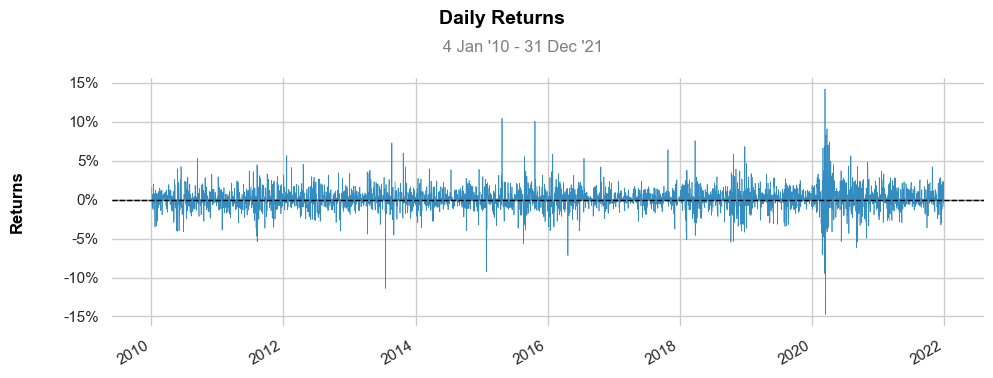




Google Daily Returns Plot:



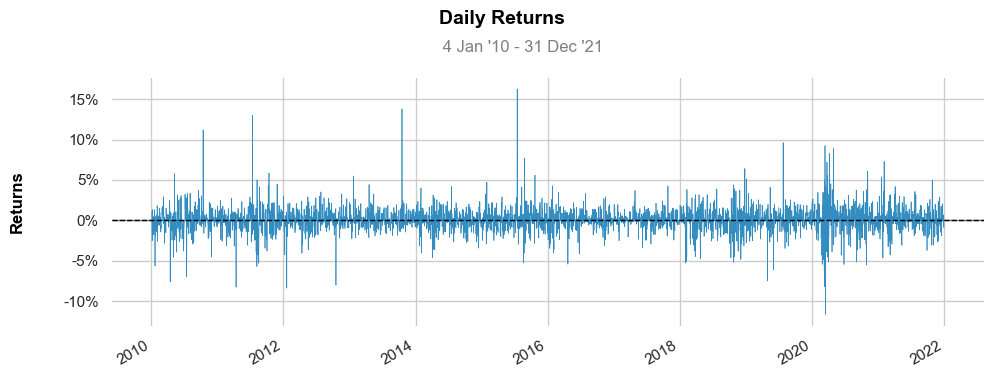




Amazon Daily Returns Plot:



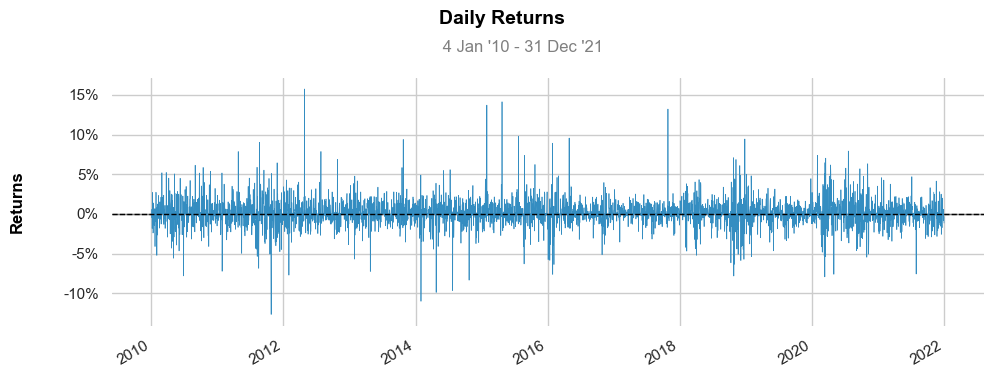

In [61]:
# Plotting Daily Returns for each stock
print('\n')
print('\nApple Daily Returns Plot:\n')
qs.plots.daily_returns(aapl_returns, benchmark='^GSPC') # Using S&P 500 as benchmark
print('\n')


print('\nMicrosoft Daily Returns Plot:\n')
qs.plots.daily_returns(msft_returns, benchmark='^GSPC') # Using S&P 500 as benchmark
print('\n')


print('\nGoogle Daily Returns Plot:\n')
qs.plots.daily_returns(googl_returns, benchmark='^GSPC') # Using S&P 500 as benchmark
print('\n')


print('\nAmazon Daily Returns Plot:\n')
qs.plots.daily_returns(amzn_returns, benchmark='^GSPC') # Using S&P 500 as benchmark
print('\n')

The plot above provide a visual representation of the daily returns for the four selected stocks (Apple, Microsoft, Google, Amazon) and the S&P 500 index. The chart illustrates the volatility and performance of each stock relative to the broader market. By comparing the stock returns to the S&P 500 index, we can identify periods of outperformance or underperformance and assess the risk-adjusted returns of the stocks.

Apple (AAPL) and Amazon (AMZN) exhibit higher volatility compared to Microsoft (MSFT) and Google (GOOGL), with more pronounced fluctuations in daily returns. The S&P 500 index serves as a benchmark for evaluating the relative performance of the stocks, providing a reference point for assessing risk-adjusted returns. The chart highlights the dynamic nature of stock returns and the importance of monitoring performance relative to the broader market.

<h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Cumulative Daily Returns</h2>

To gain further insights into the stock performance, we will calculate the cumulative returns for each stock and the S&P 500 index. The cumulative returns represent the total return on investment over a specified period, taking into account both price appreciation and dividends. By analyzing the cumulative returns, we can assess the long-term performance of the stocks and compare them to the broader market index.




Apple Cumulative Returns Plot



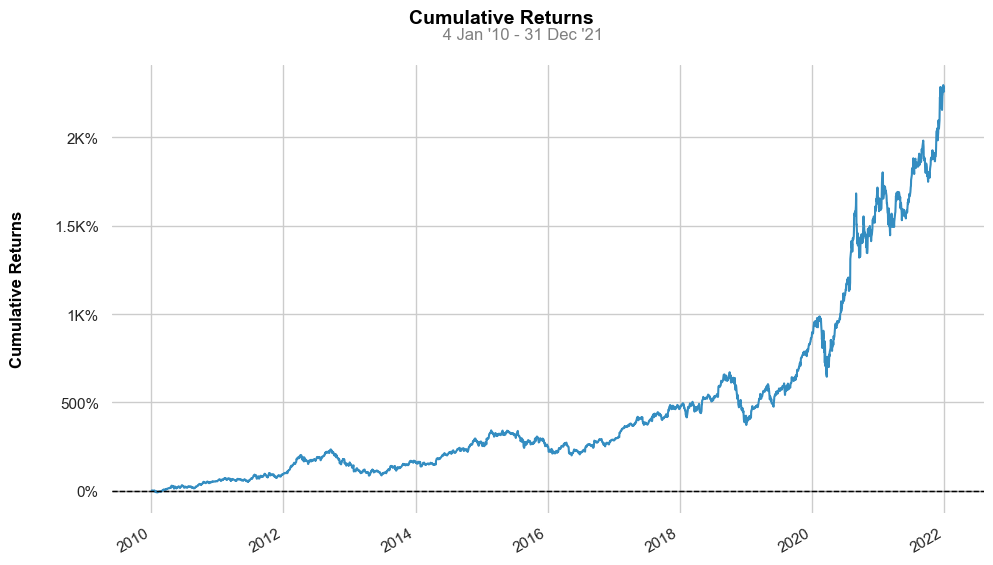






Microsoft Inc. Cumulative Returns Plot



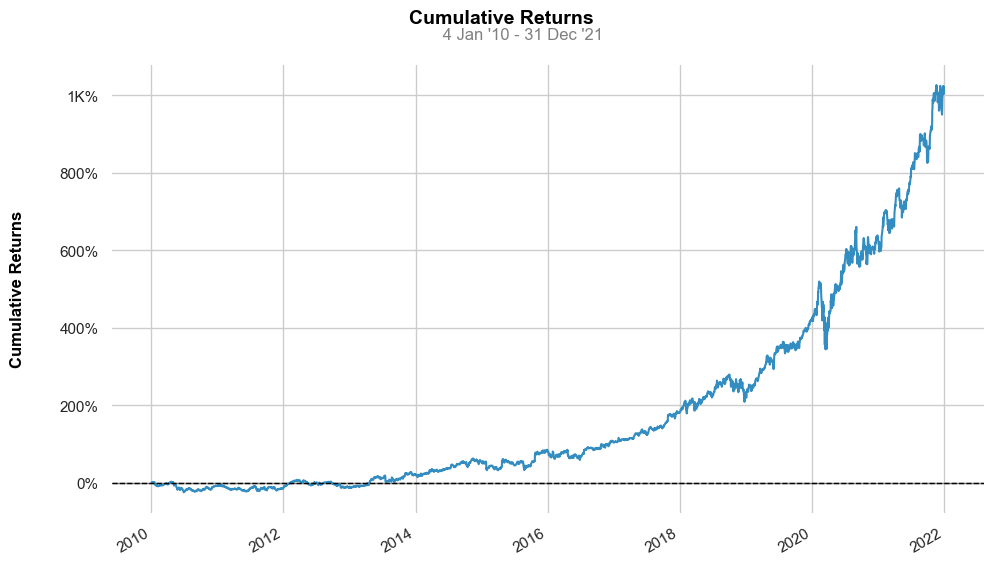






The Google Cumulative Returns Plot



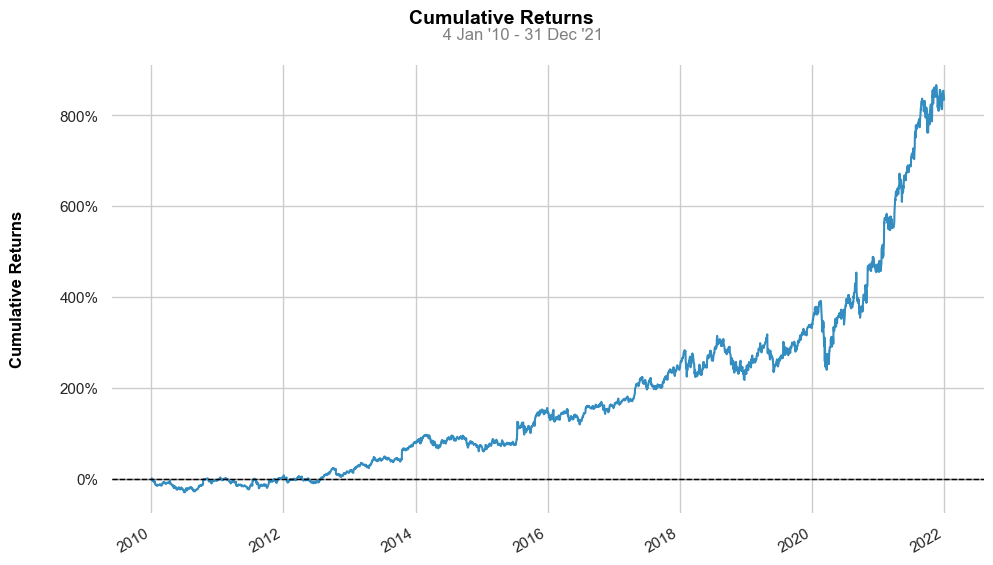

In [62]:
# Plotting Cumulative Returns for each stock
print('\n')
print('\nApple Cumulative Returns Plot\n')
qs.plots.returns(aapl_returns)
print('\n')
print('\n')
print('\nMicrosoft Inc. Cumulative Returns Plot\n')
qs.plots.returns(msft_returns)
print('\n')
print('\n')
print('\nThe Google Cumulative Returns Plot\n')
qs.plots.returns(googl_returns)
print('\n')

The chart above shows a comparison of the cumulative returns for the four selected stocks (Apple, Microsoft, Google, Amazon) and the S&P 500 index. The cumulative returns provide a comprehensive view of the long-term performance of each stock, capturing the total return on investment over the specified period. By analyzing the cumulative returns, we can identify trends, patterns, and relative performance among the stocks.

<h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Histogram of Daily Returns</h2>

The histogram of daily returns provides insights into the distribution of returns for each stock and the S&P 500 index. By visualizing the frequency and magnitude of daily returns, we can assess the volatility, risk, and performance characteristics of the stocks. The histogram highlights the distribution of returns, including the mean, standard deviation, and skewness of the returns.

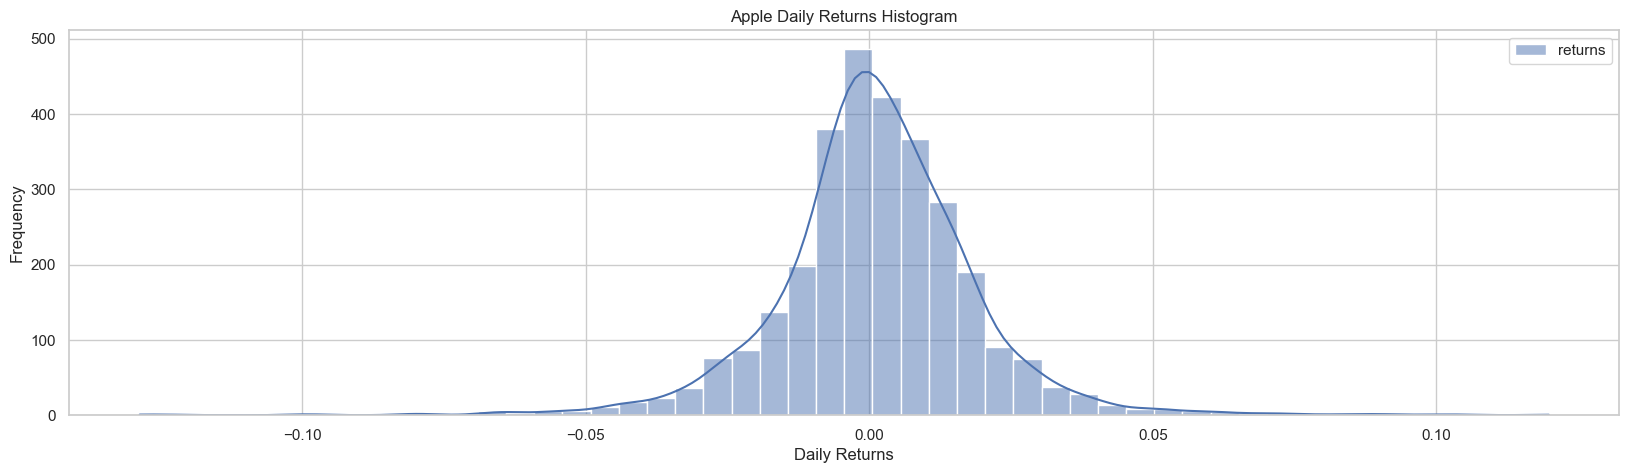

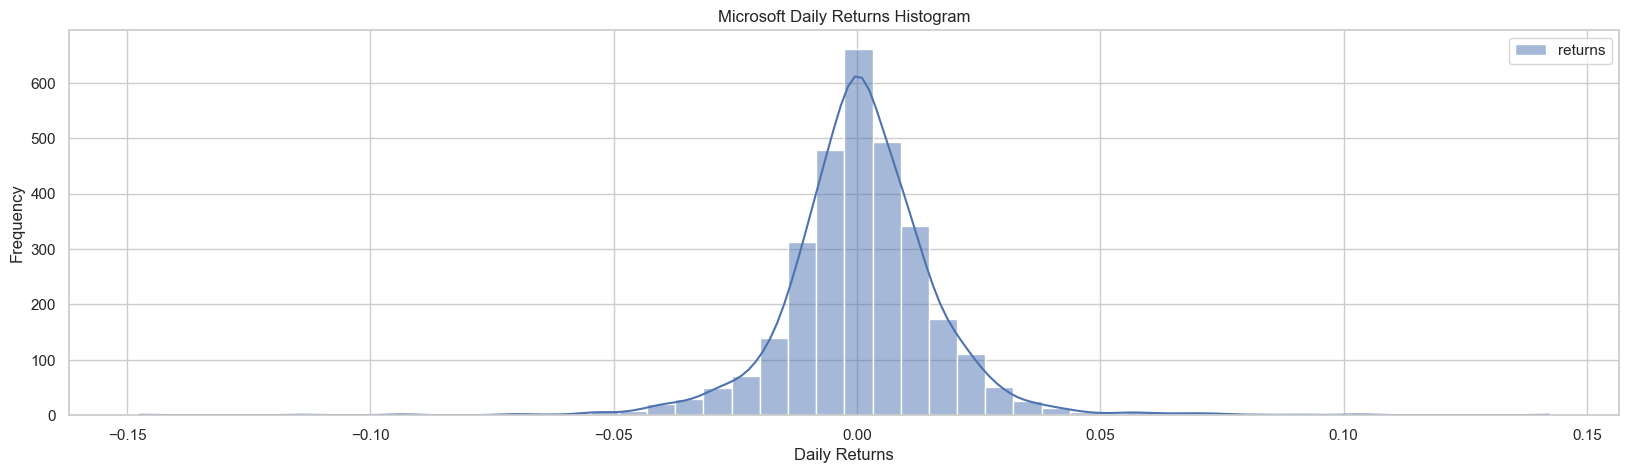

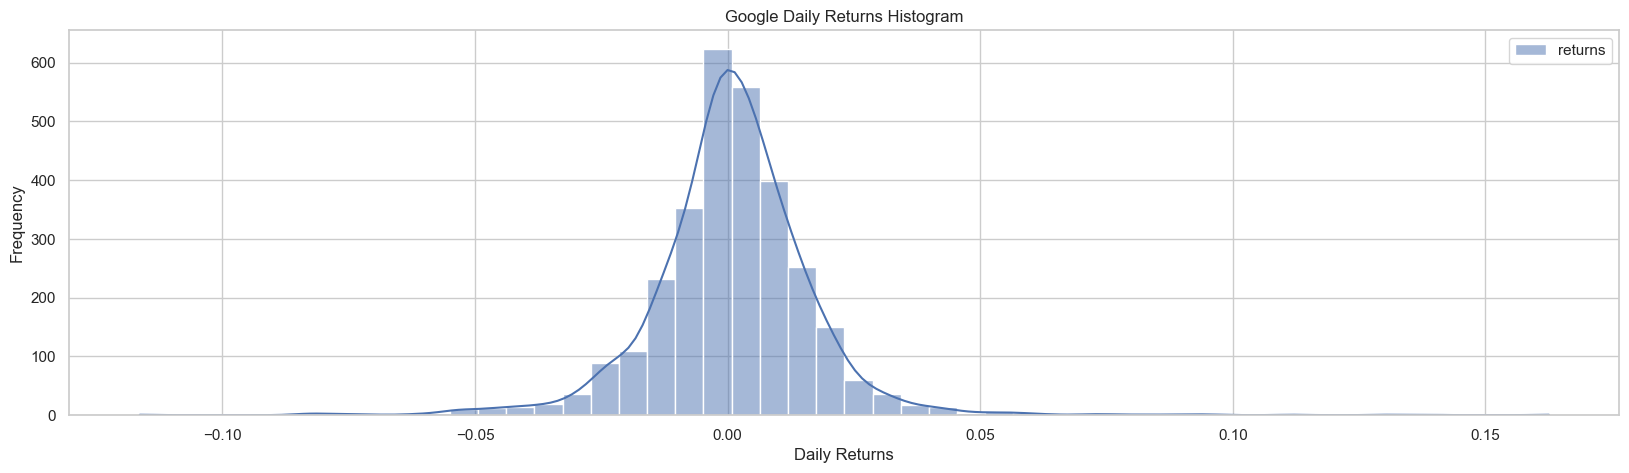

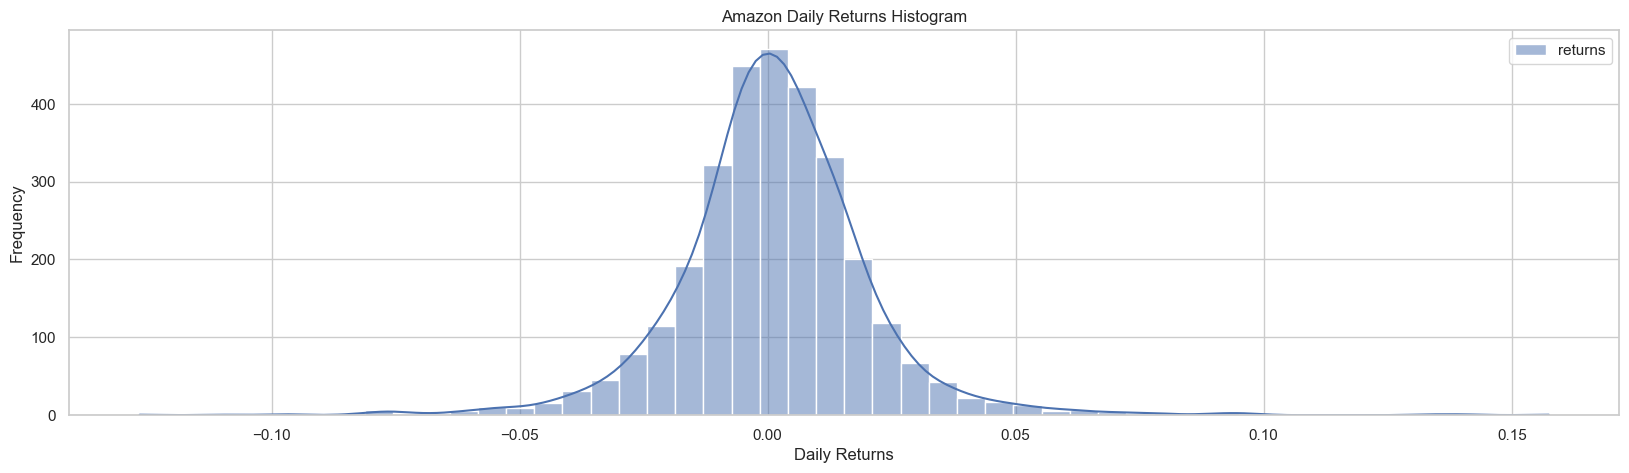

In [63]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create histograms for daily returns
# Apple
plt.figure(figsize=(20, 5))
sns.histplot(aapl_returns, bins=50, kde=True, color='cyan')
plt.title('Apple Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

# Microsoft
plt.figure(figsize=(20, 5))
sns.histplot(msft_returns, bins=50, kde=True, color='green')
plt.title('Microsoft Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

# Google
plt.figure(figsize=(20, 5))
sns.histplot(googl_returns, bins=50, kde=True, color='orange')
plt.title('Google Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

# Amazon
plt.figure(figsize=(20, 5))
sns.histplot(amzn_returns, bins=50, kde=True, color='purple')
plt.title('Amazon Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()


Through the analysis of the histogram, it is observed that the daily returns for the selected stocks and the S&P 500 index exhibit a normal distribution, with a mean close to zero and a standard deviation that reflects the volatility of the returns. The histogram provides a visual representation of the distribution of returns, enabling investors to assess the risk and performance characteristics of the stocks.

<h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Kurtosis of Daily Returns</h2>

Kurtosis is a statistical measure that quantifies the shape of the distribution of returns. It provides insights into the tails of the distribution, indicating the presence of outliers or extreme values. 

The interpretation of kurtosis values is as follows:

- A mesokurtic distribution is medium-tailed, so outliers are neither highly frequent, nor highly infrequent. The kurtosis value is close to zero.

- A leptokurtic distribution is heavy-tailed, meaning that outliers are more frequent than in a normal distribution. The kurtosis value is greater than zero.

- A platykurtic distribution is light-tailed, indicating that outliers are less frequent than in a normal distribution. The kurtosis value is less than zero.


In [64]:
# Using quantstats to measure kurtosis
print("Apple's kurtosis: ", qs.stats.kurtosis(aapl_returns).round(2))
print('\n')

print("Microsoft's kurtosis: ", qs.stats.kurtosis(msft_returns).round(2))
print('\n')

print("Google's kurtosis: ", qs.stats.kurtosis(googl_returns).round(2))
print('\n')

print("Amazon's kurtosis: ", qs.stats.kurtosis(amzn_returns).round(2))
print('\n')


Apple's kurtosis:  returns    5.78
dtype: float64


Microsoft's kurtosis:  returns    9.6
dtype: float64


Google's kurtosis:  returns    10.91
dtype: float64


Amazon's kurtosis:  returns    6.86
dtype: float64




From the above calculation, the key insights is that all the returns are above 3, which indicates that the returns are leptokurtic. This implies that the distributions of the returns have heavier tails and more extreme outliers than a normal distribution. The kurtosis values suggest that the stocks exhibit higher risk due to the potential for large deviations from the mean. The kurtosis values provide valuable insights into the risk characteristics of the stocks and can help investors assess the potential for extreme price movements.

The formula output indicates the kurtosis of daily returns for Apple, Microsoft, Google, and Amazon stocks. Here's how to interpret the values:

**Key Insights**
1. **Kurtosis > 3 (Leptokurtic)**:
   - The distributions of these returns have heavier tails and more extreme outliers than a normal distribution (kurtosis of 3). 
   - This suggests that the stocks exhibit **higher risk** due to the potential for large deviations from the mean.

2. **Kurtosis Breakdown**:
   - **Apple (5.78)**:
     - Indicates moderate outliers compared to the others, but still significant deviation from normality.
     - Risk of large, infrequent price changes exists but less extreme than Microsoft and Google.
   - **Microsoft (9.6)**:
     - Very high kurtosis suggests significant tail risk, indicating the potential for extreme price movements in Microsoft's returns.
     - This could imply higher volatility and risk exposure.
   - **Google (10.91)**:
     - Highest kurtosis in the group, meaning Google's returns are prone to extreme deviations more frequently than others.
     - Suggests that Google's stock has the most **unpredictable risk** in terms of rare events or outliers.
   - **Amazon (6.86)**:
     - Moderate tail risk compared to Microsoft and Google but higher than Apple.
     - Indicates potential for occasional extreme movements but less extreme compared to Google.


<h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Skewness of Daily Returns</h2>

The skewness of daily returns provides insights into the symmetry and shape of the distribution of returns. It quantifies the degree of asymmetry in the distribution, indicating whether the returns are skewed to the left or right. 

- A positive skewness value indicates that the distribution is skewed to the right, with a longer tail on the right side of the distribution. 

- A negative skewness value indicates that the distribution is skewed to the left, with a longer tail on the left side of the distribution.


<div style="text-align: center;">
<img src='/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/Porfolio_collection_repo/6-Portfolio-Exploring-Financial-Market-Trends-Analysis/image-2.png' alt="Description" width="500" height="300">


In [69]:
# Measuring skewness with quantstats
print('\n')
print("Apple's skewness: ", qs.stats.skew(aapl_returns).round(2))
print('\n')
print("Microsoft's skewness: ", qs.stats.skew(msft_returns).round(2))
print('\n')
print("Google's skewness: ", qs.stats.skew(googl_returns).round(2))
print('\n')
print("Amazon's skewness: ", qs.stats.skew(amzn_returns).round(2))
print('\n')



Apple's skewness:  returns   -0.1
dtype: float64


Microsoft's skewness:  returns    0.04
dtype: float64


Google's skewness:  returns    0.54
dtype: float64


Amazon's skewness:  returns    0.35
dtype: float64




**Skewness Analysis and Interpretation**

The skewness values of daily returns for Apple, Microsoft, Google, and Amazon provide insights into the symmetry of their return distributions:

1. Apple (-0.1): The skewness value falls between -0.5 and +0.5, indicating that Apple’s daily returns distribution is approximately symmetrical. The slight negative skewness suggests a negligible tendency for the data to have more values greater than the mean.

2. Microsoft (0.04): Similarly, Microsoft’s skewness is also within the range of -0.5 and +0.5, meaning its daily returns distribution is approximately symmetrical. The positive skewness indicates a minor inclination for values to be smaller than the mean, but this deviation is nearly insignificant.

3. Google (0.54): Google’s skewness lies between +0.5 and +1, suggesting a slightly positively skewed distribution. This indicates a mild tendency for more values to be smaller than the mean, with a slight right tail in the distribution.

4. Amazon (0.35): Amazon’s skewness value also falls within -0.5 and +0.5, showing that its daily returns distribution is approximately symmetrical. The positive skewness indicates a very slight bias toward smaller values than the mean, though it is not significant.

Summary
* Apple, Microsoft, and Amazon: These stocks have skewness values close to zero, indicating approximately symmetrical distributions with no significant tail dominance.

* Google: Google exhibits slight positive skewness, suggesting mild asymmetry with a tendency for smaller values (right tail dominance).

Implications
* None of the stocks show substantial nonnormality or extreme skewness, making their return distributions relatively stable and suitable for models that assume normality.

* Google’s slight positive skewness could indicate the potential for mild upward deviations in daily returns, but this skewness remains within acceptable limits.


<h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Standard Deviation of Daily Returns</h2>

The standard deviation of daily returns is a key metric for assessing the volatility and risk of the stocks. It quantifies the dispersion of returns around the mean, providing insights into the variability and potential price movements of the stocks. A higher standard deviation indicates greater volatility and risk, while a lower standard deviation suggests lower volatility and risk.

The standard deviation of daily returns for Apple, Microsoft, Google, and Amazon stocks is calculated to assess the volatility and risk characteristics of the stocks. The standard deviation provides insights into the variability and potential price movements of the stocks, helping investors assess the risk and return profile of each stock.

In [71]:
# Calculating Standard Deviations
print('\n')
print("Apple's Standard Deviation from 2010 to 2023: ", aapl_returns.std().round(3))
print('\n')
print("Microsoft's Standard Deviation from 2010 to 2023: ", msft_returns.std().round(3))
print('\n')
print("Google's Standard Deviation from 2010 to 2023: ", googl_returns.std().round(3))
print('\n')
print("Amazon's Standard Deviation from 2010 to 2023: ", amzn_returns.std().round(3))
print('\n')



Apple's Standard Deviation from 2010 to 2023:  returns    0.018
dtype: float64


Microsoft's Standard Deviation from 2010 to 2023:  returns    0.016
dtype: float64


Google's Standard Deviation from 2010 to 2023:  returns    0.016
dtype: float64


Amazon's Standard Deviation from 2010 to 2023:  returns    0.02
dtype: float64




**Interpretation of Standard Deviation for Apple, Microsoft, Google, and Amazon (2010-2023)**

Standard deviation is a measure of the volatility or the extent of variation in daily returns over a given period. A higher standard deviation indicates greater variability in returns, meaning the stock experiences larger price swings (higher risk), while a lower standard deviation suggests more stable returns.

**Key Interpretations**

Apple (0.018):
- Apple’s standard deviation of 0.018 implies moderate daily return volatility.
- The variability in Apple's returns is slightly lower than Amazon but higher than both Microsoft and Google, suggesting it is somewhat riskier than those two.

Microsoft (0.016):
- Microsoft’s standard deviation of 0.016 indicates relatively low daily return volatility.
- Microsoft exhibits the lowest variability in returns among the four stocks, suggesting it is the least risky in terms of daily price fluctuations.

Google (0.016):
- Google shares the same standard deviation as Microsoft (0.016), indicating similarly low return variability.
- Like Microsoft, Google offers relatively stable returns, which may appeal to investors seeking lower risk.

Amazon (0.02):
- Amazon has the highest standard deviation among the four stocks, at 0.02.
- This suggests Amazon exhibits the greatest daily return variability, indicating it is the riskiest of the group.

Comparison and Insights
* Most Volatile: Amazon, with the highest standard deviation (0.02), experiences the greatest fluctuations in daily returns. This aligns with its reputation for higher risk and growth potential.
* Least Volatile: Microsoft and Google, with the lowest standard deviations (0.016), are the most stable, offering consistent returns with minimal price swings.
* Moderate Risk: Apple, with a standard deviation of 0.018, sits between the stability of Microsoft/Google and the higher volatility of Amazon. It offers a balance of risk and return potential.

Implications
* Investors seeking lower risk may prefer Microsoft and Google, which exhibit the lowest return variability.
* Amazon, with the highest standard deviation, may appeal to investors seeking higher growth potential but should be approached with caution due to its greater risk.
* Apple offers a moderate risk-return profile, providing a balance between stability and growth potential.

<h3 id = 'pairplots-correlation' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Pairplots and Correlation Matrix</h2>

Correlation analysis is crucial for identifying relationships between assets and optimizing portfolios. In your stock analysis of Apple, Microsoft, Google, and Amazon, it helps develop strategies like Long-Short, where positively correlated stocks move together, while negatively correlated stocks provide better opportunities for profit by moving in opposite directions.   

It also helps manage systemic risk, where a highly correlated portfolio may suffer significant losses if a specific sector faces a downturn. Diversifying with less correlated or negatively correlated assets reduces such risks.  
 
Tools like correlation matrices and pairplots visualize relationships between stocks. Correlation values range from -1 (perfect negative) to 1 (perfect positive), indicating whether assets move together or inversely. For example, analyzing correlations among these stocks can reveal opportunities for Long-Short strategies or diversification.
By integrating correlation analysis, you can uncover profitable strategies, mitigate risks, and make data-driven investment decisions.

In [73]:
# Merging daily returns into one dataframe
merged_df = pd.concat([aapl_returns, msft_returns, googl_returns, amzn_returns], join = 'outer', axis = 1)
merged_df.columns = ['aapl', 'msft', 'googl', 'amzn']
merged_df # Displaying dataframe

,aapl,msft,googl,amzn
Date,,,,
2010-01-04,0.015565,0.015420,0.010920,-0.004609
2010-01-05,0.001729,0.000323,-0.004404,0.005900
2010-01-06,-0.015906,-0.006137,-0.025209,-0.018116
2010-01-07,-0.001849,-0.010400,-0.023280,-0.017013
2010-01-08,0.006648,0.006897,0.013331,0.027077
...,...,...,...,...
2021-12-27,0.022975,0.023186,0.006738,-0.008178
2021-12-28,-0.005767,-0.003504,-0.008245,0.005844
2021-12-29,0.000502,0.002051,-0.000218,-0.008555


The dataframe above has dates serving as the index and each stock is represented as a column, displaying their respective returns for each specific day. This dataframe will be used to calculate the correlation between these stocks and to create a pairplot visualization.</p>

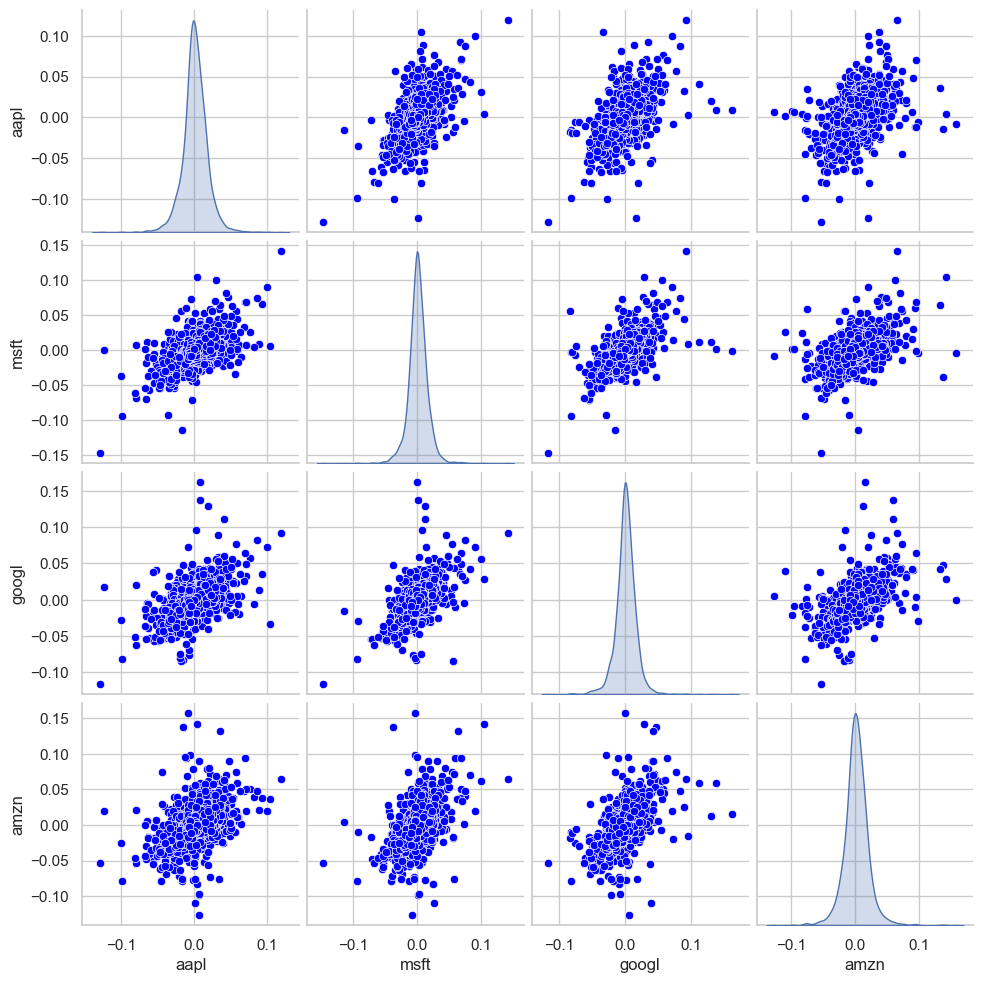

In [76]:
sns.pairplot(merged_df, diag_kind='kde', plot_kws={'color':'blue'})